In [1]:
import kagglehub
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

In [2]:
!python --version

Python 3.11.9


In [3]:
!pip list

Package                           Version
--------------------------------- -----------
annotated-types                   0.7.0
anyio                             4.11.0
argon2-cffi                       25.1.0
argon2-cffi-bindings              25.1.0
arrow                             1.4.0
asttokens                         3.0.0
async-lru                         2.0.5
attrs                             25.4.0
babel                             2.17.0
beautifulsoup4                    4.14.2
bleach                            6.3.0
certifi                           2025.10.5
cffi                              2.0.0
charset-normalizer                3.4.4
colorama                          0.4.6
comm                              0.2.3
contourpy                         1.3.3
cycler                            0.12.1
dacite                            1.9.2
debugpy                           1.8.17
decorator                         5.2.1
defusedxml                        0.7.1
executing           

In [4]:
# DOWNLOAD DO KAGGLE
# Set kagglehub cache to local datasets folder
os.environ['KAGGLEHUB_CACHE'] = os.path.abspath('')

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")
print("Path to dataset files:", path)

Path to dataset files: d:\post-graduate\clusterizacao\notebooks\datasets\rohan0301\unsupervised-learning-on-country-data\versions\2


In [5]:
# Lendo o dataset
df = pd.read_csv(path + '/Country-data.csv')
print(f"Total de países únicos: {df['country'].nunique()}")


Total de países únicos: 167


# Análise exploratória

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.shape

(167, 10)

In [9]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Visualização em Gráficos

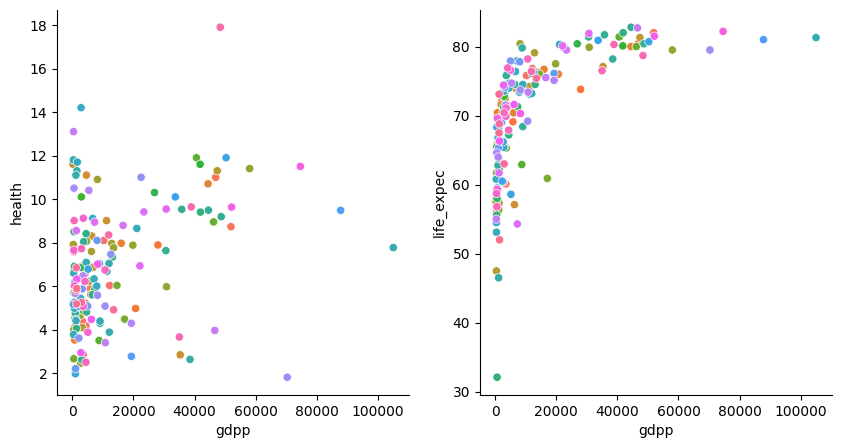

In [11]:
# #----------Seaborn Scatter Plot----------
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(data=df, x='gdpp', y='health', hue='country', ax=ax[0], legend=False)
sns.scatterplot(data=df, x='gdpp', y='life_expec', hue='country', ax=ax[1], legend=False)
sns.despine()
plt.show()

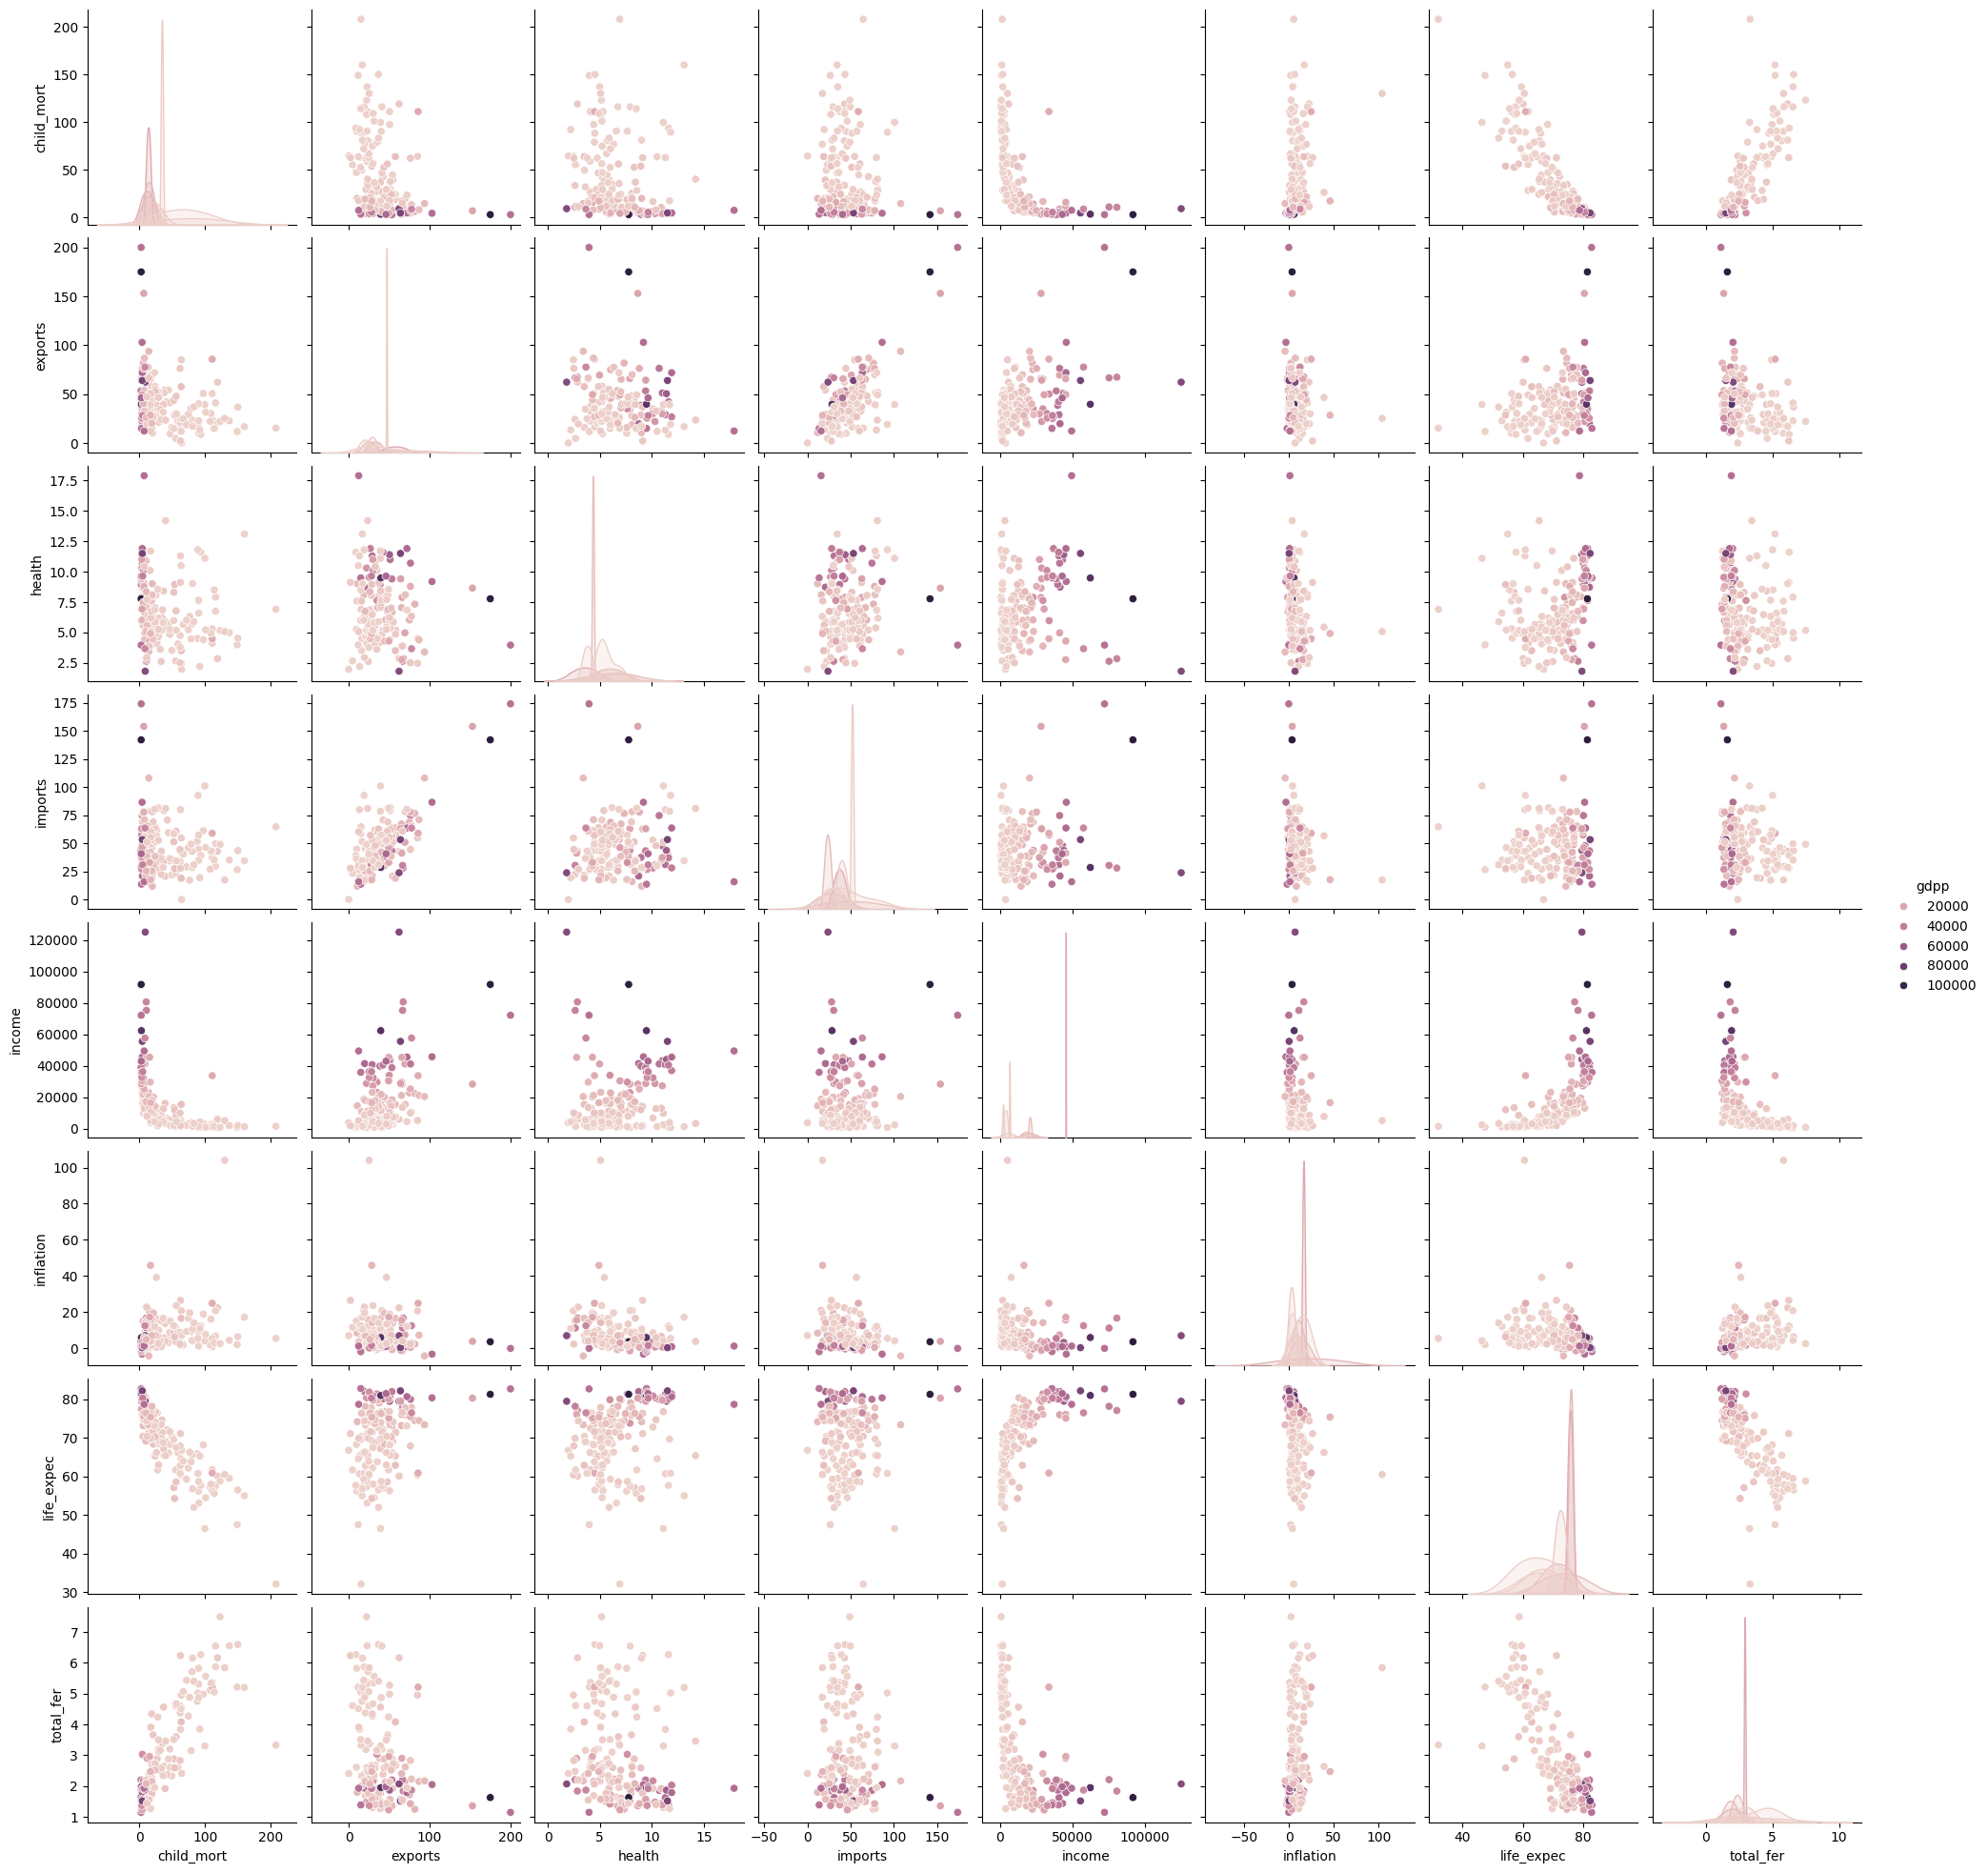

In [12]:
sns.pairplot(data=df.iloc[:, 1:], hue='gdpp')

plt.show()

In [13]:
fig = px.scatter_matrix(df, dimensions=['gdpp', 'health', 'life_expec', 'child_mort'],
                        hover_name='country', color='country')

fig.show()

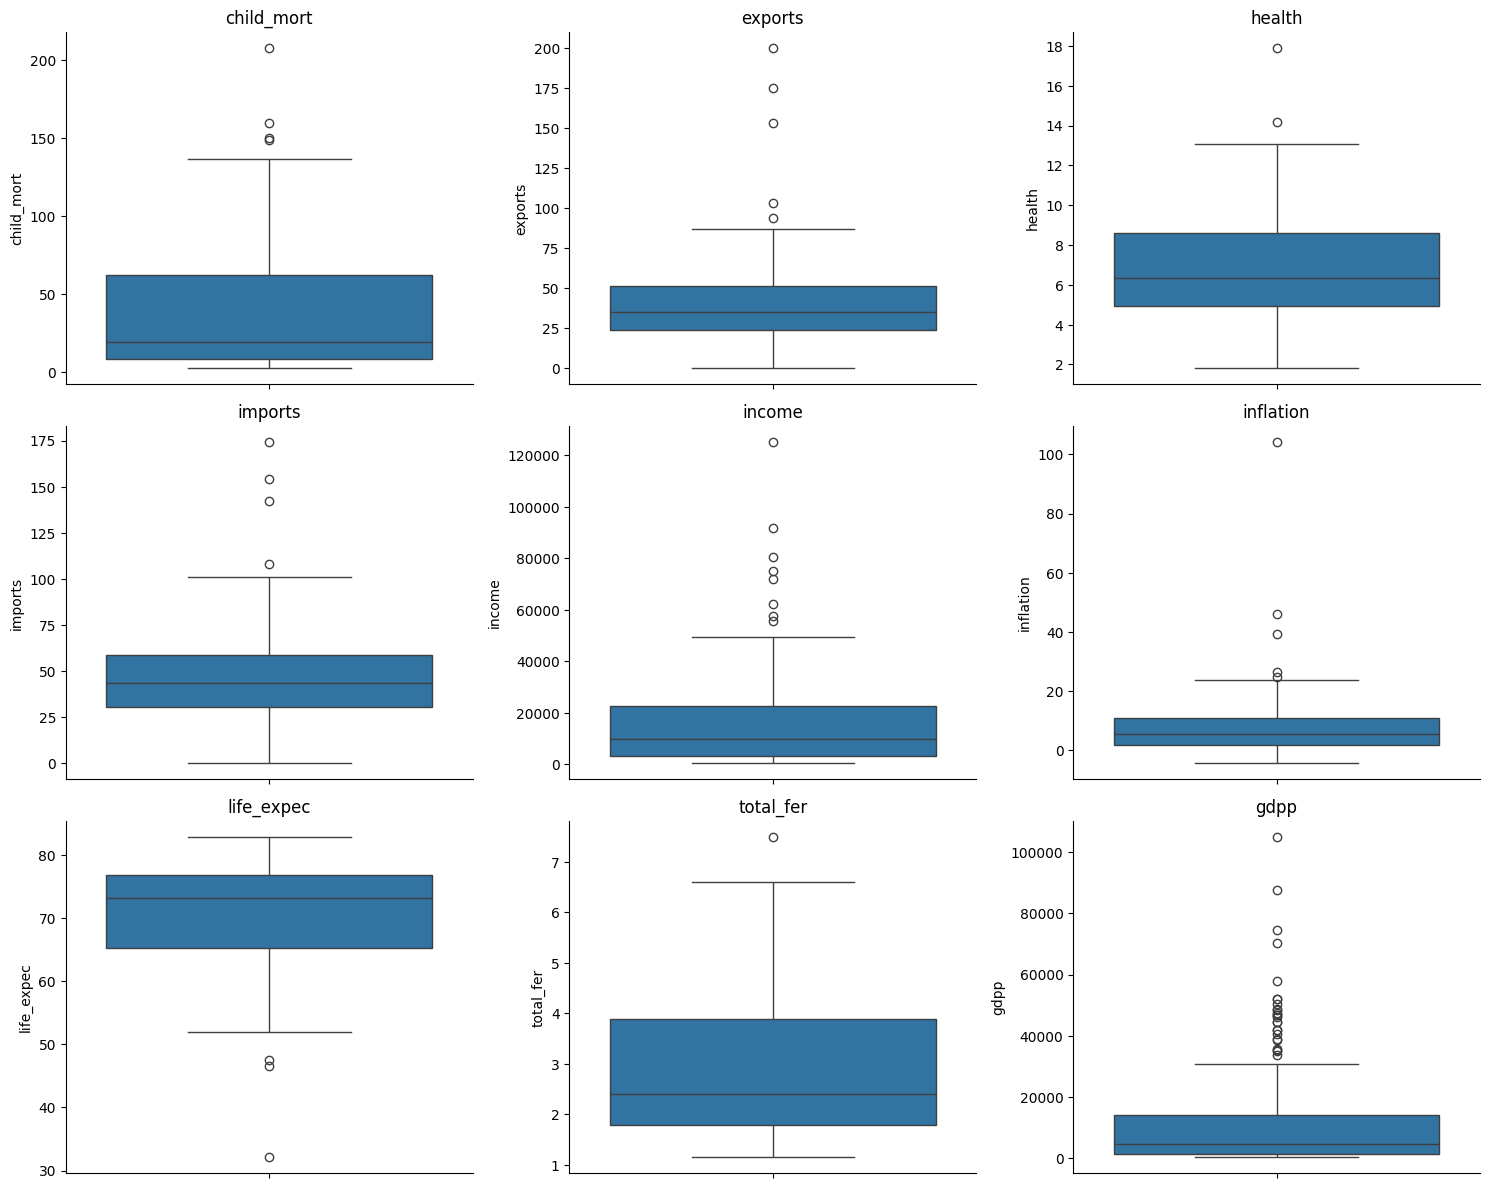

In [14]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = len(numeric_cols)

f, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for i, column in enumerate(numeric_cols):
    sns.boxplot(data=df, y=column, ax=ax[i])
    ax[i].set_title(column)

sns.despine()
plt.tight_layout()
plt.show()

Pela faixa dinâmica e pelas escalas é possível notar discrepância e necessidade de padronização dos dados:

In [15]:
print("\nFaixa dinâmica (max - min):")
print(df[numeric_cols].max() - df[numeric_cols].min())


Faixa dinâmica (max - min):
child_mort       205.4000
exports          199.8910
health            16.0900
imports          173.9341
income        124391.0000
inflation        108.2100
life_expec        50.7000
total_fer          6.3400
gdpp          104769.0000
dtype: float64


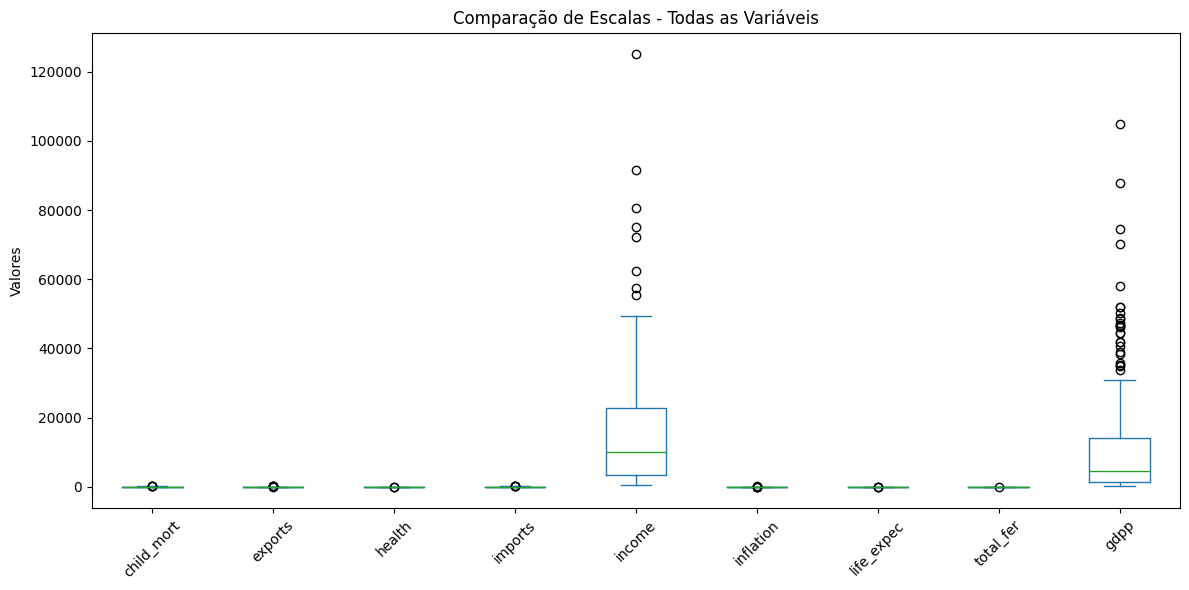

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
df[numeric_cols].plot(kind='box', ax=ax)
plt.xticks(rotation=45)
plt.title('Comparação de Escalas - Todas as Variáveis')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# Padronização

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_cols])
df_padronized = pd.DataFrame(data_scaled, columns=numeric_cols)

if 'country' in df.columns:
    df_padronized.insert(0, 'country', df['country'])

df_padronized.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


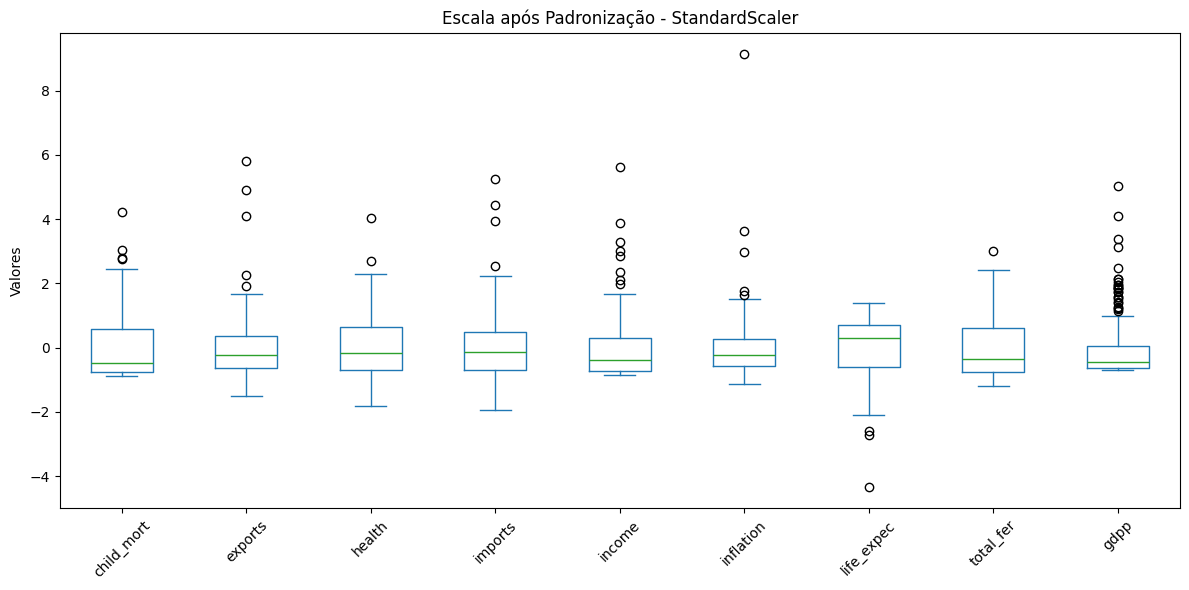

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
df_padronized[numeric_cols].plot(kind='box', ax=ax)
plt.xticks(rotation=45)
plt.title('Escala após Padronização - StandardScaler')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

# K-Médias

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [21]:
wss_list = []
si_list = []
dbi_list = []
chi_list = []

In [22]:
for k in range(2, 11):

  kmeans = KMeans(n_clusters=k, random_state=42).fit(df_padronized.select_dtypes(include=['float']))

  wss_list.append(kmeans.inertia_)
  si_list.append(silhouette_score(df_padronized.select_dtypes(include=['float']), kmeans.labels_))
  dbi_list.append(davies_bouldin_score(df_padronized.select_dtypes(include=['float']), kmeans.labels_))
  chi_list.append(calinski_harabasz_score(df_padronized.select_dtypes(include=['float']), kmeans.labels_))

In [23]:
len(wss_list), len(si_list), len(dbi_list), len(chi_list)

(9, 9, 9, 9)

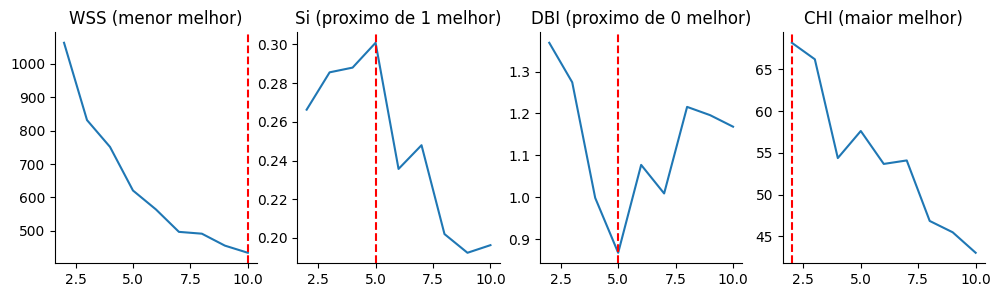

In [24]:
f, ax = plt.subplots(1, 4, figsize=(12, 3))

sns.lineplot(x=range(2, 11), y=wss_list, ax=ax[0])
sns.lineplot(x=range(2, 11), y=si_list, ax=ax[1])
sns.lineplot(x=range(2, 11), y=dbi_list, ax=ax[2])
sns.lineplot(x=range(2, 11), y=chi_list, ax=ax[3])

ax[0].set_title('WSS (menor melhor)')
ax[1].set_title('Si (proximo de 1 melhor)')
ax[2].set_title('DBI (proximo de 0 melhor)')
ax[3].set_title('CHI (maior melhor)')

ax[0].axvline(x=10, color='red', linestyle='--')
ax[1].axvline(x=5, color='red', linestyle='--')
ax[2].axvline(x=5, color='red', linestyle='--')
ax[3].axvline(x=2, color='red', linestyle='--')

sns.despine()
plt.show()

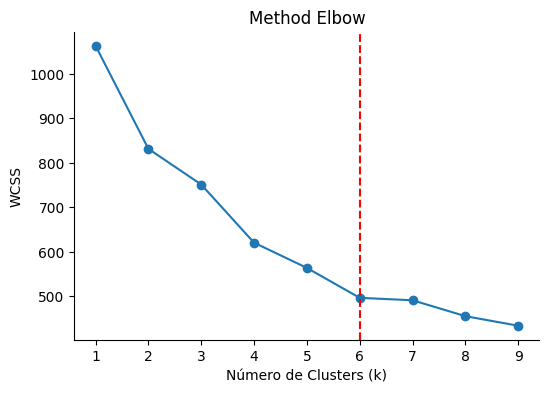

In [25]:
def elbow_method_plot(wss_list, init_k=1):
  f, ax = plt.subplots(figsize=(6, 4))
  ax.plot(range(init_k, (len(wss_list) + 1)), wss_list, marker='o')
  ax.set_xlabel('Número de Clusters (k)')
  ax.set_ylabel('WCSS')
  ax.axvline(x=6, color='red', linestyle='--')
  ax.set_title('Method Elbow')

  sns.despine()
  plt.show()

elbow_method_plot(wss_list)

In [26]:
results_df = pd.DataFrame({
    'WSS': wss_list,
    'Si': si_list,
    'DBI': dbi_list,
    'CHI': chi_list
}, index=range(2, 11))

results_df

,WSS,Si,DBI,CHI
2,1063.482560,0.266296,1.368622,68.191412
3,831.535158,0.285601,1.274215,66.215020
4,751.191575,0.288047,0.998261,54.377950
5,620.362153,0.300882,0.867149,57.622524
6,563.560286,0.235650,1.077017,53.676527
7,496.269600,0.247931,1.008799,54.095887
8,490.800836,0.201982,1.215522,46.844625
9,455.017022,0.192307,1.195809,45.487669
10,433.538441,0.196245,1.168258,43.032315


## Análise de Silhueta

In [27]:
# Encontrar o melhor k para cada métrica
print("\n" + "="*80)
print("MELHOR K POR MÉTRICA")
print("="*80)

# WSS - menor é melhor
best_wss_idx = np.argmin(wss_list)
best_wss_k = best_wss_idx + 2
print(f"WSS:     k={best_wss_k} com valor {wss_list[best_wss_idx]:.2f} (menor melhor)")

# Silhouette - próximo de 1 é melhor (maior é melhor)
best_si_idx = np.argmax(si_list)
best_si_k = best_si_idx + 2
print(f"Silhouette:        k={best_si_k} com valor {si_list[best_si_idx]:.4f} (próximo de 1 melhor)")

# Davies-Bouldin - próximo de 0 é melhor (menor é melhor)
best_dbi_idx = np.argmin(dbi_list)
best_dbi_k = best_dbi_idx + 2
print(f"Davies-Bouldin:    k={best_dbi_k} com valor {dbi_list[best_dbi_idx]:.4f} (próximo de 0 melhor)")

# Calinski-Harabasz - maior é melhor
best_chi_idx = np.argmax(chi_list)
best_chi_k = best_chi_idx + 2
print(f"Calinski-Harabasz: k={best_chi_k} com valor {chi_list[best_chi_idx]:.2f} (maior melhor)")

k_vencedor = 5
print("\n" + "="*80)
print(f"NÚMERO ÓTIMO DE CLUSTERS: k={k_vencedor}")


MELHOR K POR MÉTRICA
WSS:     k=10 com valor 433.54 (menor melhor)
Silhouette:        k=5 com valor 0.3009 (próximo de 1 melhor)
Davies-Bouldin:    k=5 com valor 0.8671 (próximo de 0 melhor)
Calinski-Harabasz: k=2 com valor 68.19 (maior melhor)

NÚMERO ÓTIMO DE CLUSTERS: k=5


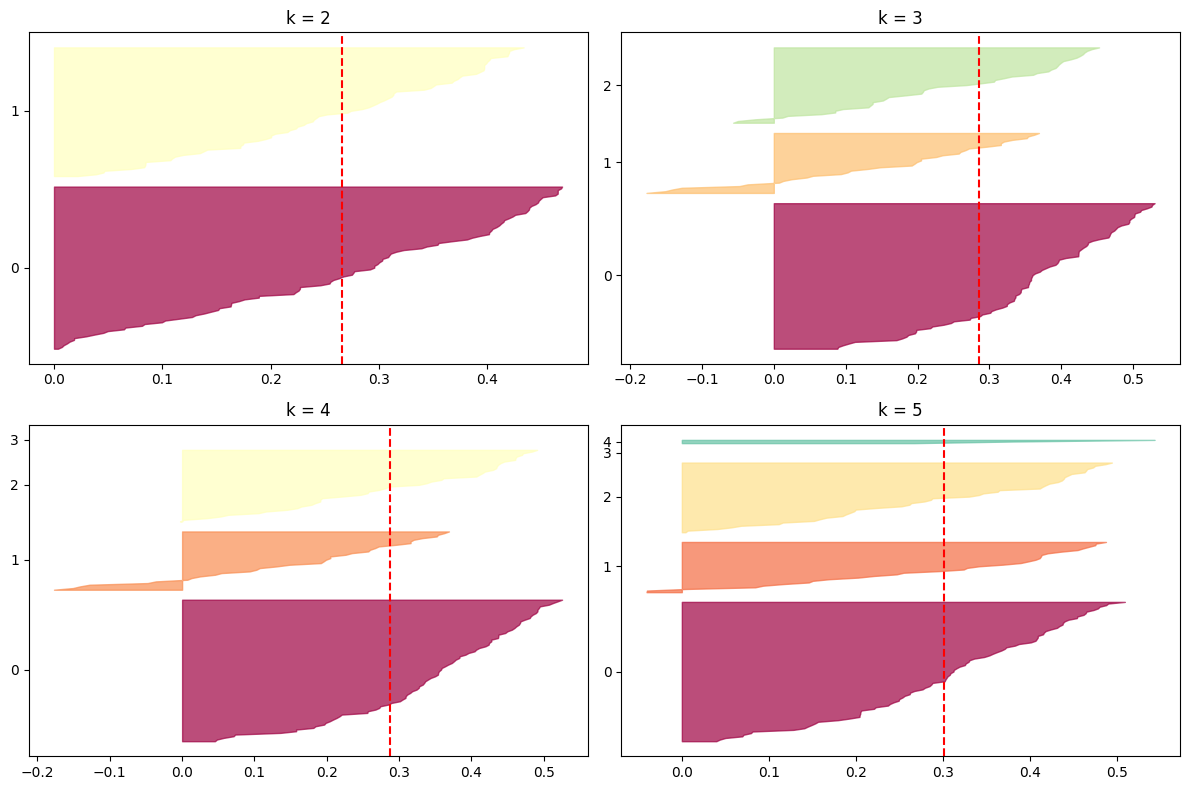

In [28]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

X_data = df_padronized.select_dtypes(include=['float'])

plt.figure(figsize=(12, 8))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_data)
    silhouette_coefficients = silhouette_samples(X_data, kmeans.labels_)
    
    padding = len(X_data) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        sample_silhouette_values = silhouette_coefficients[kmeans.labels_ == i]
        sample_silhouette_values.sort()
        
        color = mpl.cm.Spectral(i / k)
        
        plt.fill_betweenx(
            np.arange(pos, pos + len(sample_silhouette_values)),
            0,
            sample_silhouette_values,
            alpha=0.7,
            facecolor=color,
            edgecolor=color
        )
        ticks.append(pos + len(sample_silhouette_values) // 2)
        pos += len(sample_silhouette_values) + padding
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    plt.axvline(x=silhouette_score(X_data, kmeans.labels_), color='red', linestyle='--')
    plt.title(f'k = {k}')

plt.tight_layout()
plt.show()

In [29]:
results_scaled_df = StandardScaler().fit_transform(results_df)
results_scaled_df = pd.DataFrame(results_scaled_df, columns=results_df.columns, index=results_df.index)
results_scaled_df

,WSS,Si,DBI,CHI
2,2.165510,0.508918,1.619240,1.680730
3,0.996073,0.995494,0.977524,1.439980
4,0.590995,1.057148,-0.898235,-0.001927
5,-0.068624,1.380656,-1.789450,0.393304
6,-0.355009,-0.263503,-0.362902,-0.087369
7,-0.694276,0.046038,-0.826605,-0.036286
8,-0.721849,-1.112096,0.578567,-0.919583
9,-0.902264,-1.355955,0.444566,-1.084877
10,-1.010556,-1.256701,0.257293,-1.383971


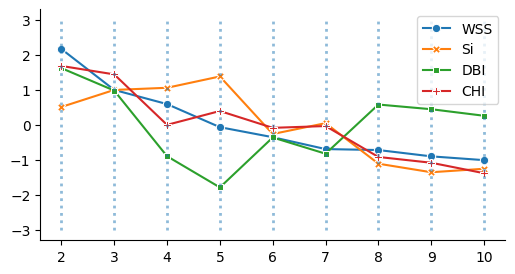

In [30]:
f, ax = plt.subplots(figsize=(6, 3))

sns.lineplot(data=results_scaled_df, markers=True, dashes=False, ax=ax)

for k in range(2, 11):
  ax.vlines(k, -3, 3, linestyles=':', linewidth=2, alpha=0.5)

sns.despine()
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_padronized.select_dtypes(include=['float']))

In [32]:
df_padronized['cluster_kmeans'] = kmeans.labels_
df_padronized.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0


In [33]:
df_padronized['cluster_kmeans'].value_counts()

cluster_kmeans
0    87
2    44
1    32
4     3
3     1
Name: count, dtype: int64

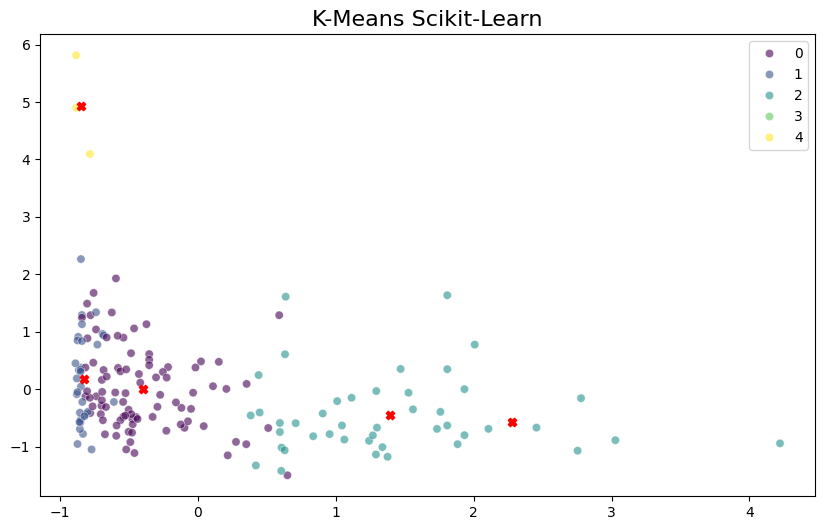

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=kmeans.labels_, palette='viridis', alpha=0.6, ax=ax)
ax.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='X',
    color='red',
)
ax.set_title('K-Means Scikit-Learn', fontsize=16)

plt.show()

# DBScan

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

C:\Users\caahs\AppData\Local\Temp\ipykernel_9396\3749563624.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



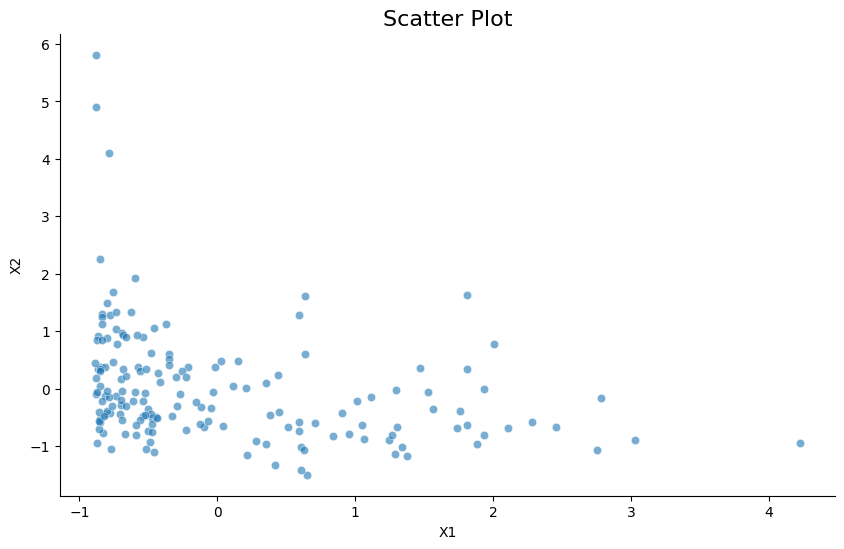

In [36]:
df_float = df_padronized.select_dtypes(include=['float'])
df_float

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x=df_float.iloc[:, 0], y=df_float.iloc[:, 1], palette='viridis', alpha=0.6, ax=ax)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Scatter Plot', fontsize=16)

sns.despine()
plt.show()

In [37]:
int(np.log(df_float.shape[0]))

5

In [38]:
for i in range(3, (int(np.log(df_float.shape[0])) + 1), 1):
  print(i)

3
4
5


In [39]:
min_samples_range = range(3, (int(np.log(df_float.shape[0])) + 1), 1)

best_min_samples = None
best_score = -1

for min_samples in min_samples_range:
  dbscan_model = DBSCAN(eps=1.5, min_samples=min_samples).fit(df_float)

  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster
  if len(set(labels)) > 1:

    score = silhouette_score(df_float, labels)

    print('Min_samples:', min_samples)
    print('Score:', score)
    print('-----------------------------------')

    if score > best_score:
      best_score = score
      best_min_samples = min_samples


print(f'Melhor min_samples: {best_min_samples}')
print(f'Melhor score: {best_score}')

Min_samples: 3
Score: 0.15404733154651618
-----------------------------------
Min_samples: 4
Score: 0.2898901743361525
-----------------------------------
Min_samples: 5
Score: 0.28829596251907025
-----------------------------------
Melhor min_samples: 4
Melhor score: 0.2898901743361525


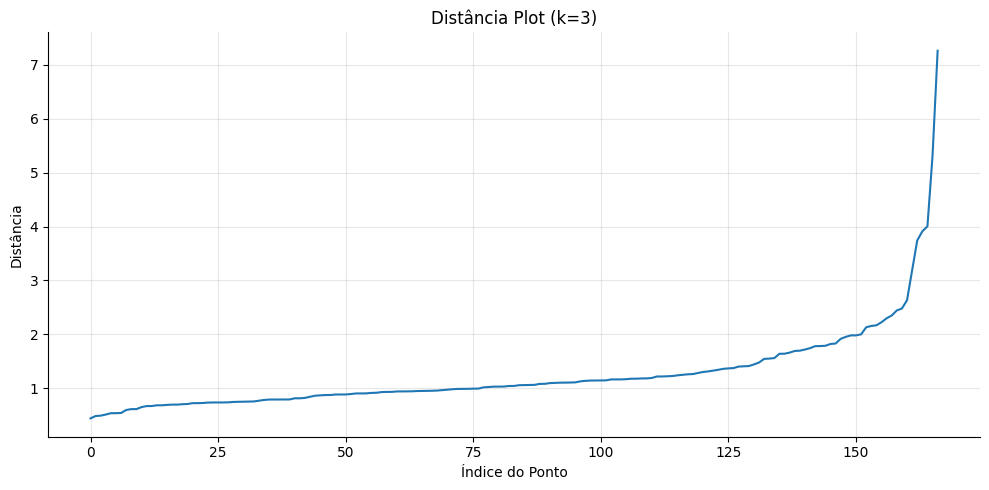

In [40]:
from sklearn.neighbors import NearestNeighbors

k = best_min_samples - 1

# Calcular knn
nbrs = NearestNeighbors(n_neighbors=k).fit(df_float)
distances, indices = nbrs.kneighbors(df_float)

# Pegar a distância do k-ésimo vizinho mais próximo para cada ponto
k_distances = distances[:, -1]

# Ordenar as distâncias em ordem crescente
k_distances = np.sort(k_distances)

f, ax = plt.subplots(figsize=(10, 5))
ax.plot(k_distances)
ax.set_xlabel('Índice do Ponto')
ax.set_ylabel('Distância')
ax.set_title(f'Distância Plot (k={k})')
ax.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()


Knee detectado no índice: 154
Eps recomendado: 2.1689


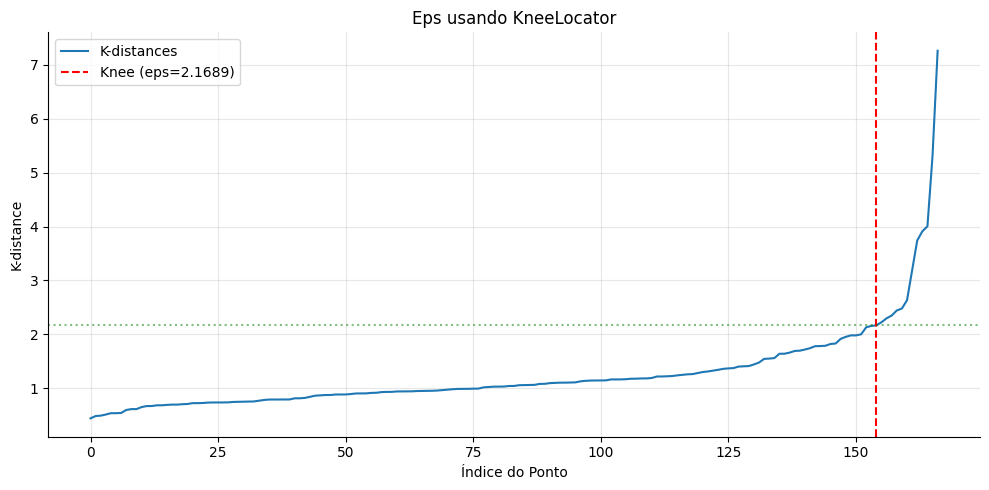

In [41]:
kneedle = KneeLocator(
    range(len(k_distances)), 
    k_distances, 
    curve='convex', 
    direction='increasing'
)

# Extrair valor de eps
eps = k_distances[kneedle.knee]

print(f"Knee detectado no índice: {kneedle.knee}")
print(f"Eps recomendado: {eps:.4f}")

#Visualizar
f, ax = plt.subplots(figsize=(10, 5))
ax.plot(k_distances, label='K-distances')
ax.axvline(x=kneedle.knee, color='red', linestyle='--', label=f'Knee (eps={eps:.4f})')
ax.axhline(y=eps, color='green', linestyle=':', alpha=0.5)
ax.set_xlabel('Índice do Ponto')
ax.set_ylabel('K-distance')
ax.set_title('Eps usando KneeLocator')
ax.legend()
ax.grid(True, alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [42]:
#GRID-BASED
eps_values = np.linspace(1.0, 2.5, 15) # 15 valores entre 1.5 e 2.5
min_samples_values = range(3, (int(np.log(df_float.shape[0])) + 1), 1) #

In [43]:
param_grid = []
for eps in eps_values:
  for min_samples in min_samples_values:
    param_grid.append({
        'eps': eps,
        'min_samples': min_samples
    })
print('N param', len(param_grid))

N param 45


In [ ]:
best_params = None
best_score = -1

for param in param_grid:

  eps = param['eps']
  min_samples = param['min_samples']

  dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_float)
  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster
  # if len(set(labels)) > 1:
  if len(set(labels)) > 2:
    score = silhouette_score(df_float, labels)

    print('min_samples:', min_samples)
    print('eps:', eps)
    print('Score:', score)
    print('-----------------------------------')

    if score > best_score:
      best_score = score
      best_params = param


print(f'Melhor parametros: {best_params}')
print(f'Melhor score: {best_score}')

min_samples: 3
eps: 1.0
Score: 0.011714126637591615
-----------------------------------
min_samples: 4
eps: 1.0
Score: -0.031864041355940634
-----------------------------------
min_samples: 5
eps: 1.0
Score: -0.024818901891032592
-----------------------------------
min_samples: 3
eps: 1.1071428571428572
Score: 0.09776654611451607
-----------------------------------
min_samples: 4
eps: 1.1071428571428572
Score: 0.11752300922835182
-----------------------------------
min_samples: 5
eps: 1.1071428571428572
Score: 0.011275193452685276
-----------------------------------
min_samples: 3
eps: 1.2142857142857142
Score: 0.1268191178108563
-----------------------------------
min_samples: 4
eps: 1.2142857142857142
Score: 0.1550241410886239
-----------------------------------
min_samples: 5
eps: 1.2142857142857142
Score: 0.14844269545611685
-----------------------------------
min_samples: 3
eps: 1.3214285714285714
Score: -0.018287587417105067
-----------------------------------
min_samples: 4
eps:

In [63]:
best_params['eps']

np.float64(1.3214285714285714)

In [64]:
best_params['min_samples']

5

Silhouette Score: 0.207


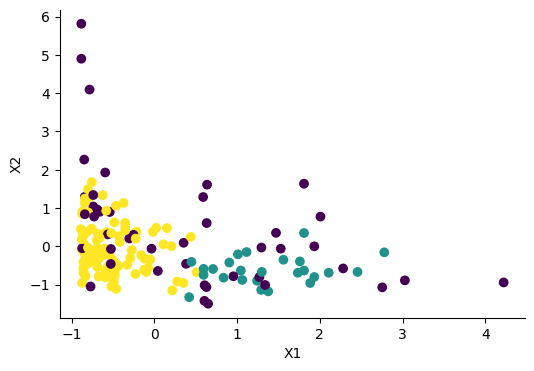

In [65]:
dbscan_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(df_float)
labels = dbscan_model.labels_

sil = silhouette_score(df_float, labels)
print(f'Silhouette Score: {sil:.3f}')

f, ax = plt.subplots(figsize=(6,4))

ax.scatter(x=df_float.iloc[:, 0], y=df_float.iloc[:, 1], c=labels)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

sns.despine()
plt.show()

In [66]:
print(f'Número de clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
print(f'Número de pontos ruídos: {list(labels).count(-1)}')

Número de clusters: 2
Número de pontos ruídos: 45


## Davies-Bouldin

In [47]:
from sklearn.metrics import davies_bouldin_score

min_samples_range = range(3, (int(np.log(df_float.shape[0])) + 1), 1)

dbi_best_min_samples = None
dbi_best_score = float('inf')  # Inicializa com infinito pois menor é melhor

for min_samples in min_samples_range:
  dbscan_model = DBSCAN(eps=1.0, min_samples=min_samples).fit(df_float)
  
  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster
  if len(set(labels)) > 1:
    # Filtrar pontos de ruído
    # mask = labels != -1
    
    # if mask.sum() > 0:
      # score = davies_bouldin_score(df_float[mask], labels[mask])
      score = davies_bouldin_score(df_float, labels)
      
      print('Min_samples:', min_samples)
      print('Davies-Bouldin Score:', score)
      print('-----------------------------------')
      
      # Menor score é melhor
      if score < dbi_best_score:
          dbi_best_score = score
          dbi_best_min_samples = min_samples

print(f'\nMelhor min_samples: {dbi_best_min_samples}')
print(f'Melhor Davies-Bouldin Score: {dbi_best_score:.4f}')
print('(Quanto mais próximo de 0, melhor)')

Min_samples: 3
Davies-Bouldin Score: 1.870894248179196
-----------------------------------
Min_samples: 4
Davies-Bouldin Score: 2.0010441550084117
-----------------------------------
Min_samples: 5
Davies-Bouldin Score: 1.908956201140084
-----------------------------------

Melhor min_samples: 3
Melhor Davies-Bouldin Score: 1.8709
(Quanto mais próximo de 0, melhor)


In [48]:
best_params = None
best_score = float('inf')

for param in param_grid:

  eps = param['eps']
  min_samples = param['min_samples']

  dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_float)
  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster
  if len(set(labels)) > 1:

    score = davies_bouldin_score(df_float, labels)

    print('min_samples:', min_samples)
    print('eps:', eps)
    print('Score:', score)
    print('-----------------------------------')

    if score < best_score:
      best_score = score
      best_params = param


print(f'Melhor parametros: {best_params}')
print(f'Melhor score: {best_score}')

min_samples: 3
eps: 1.0
Score: 1.870894248179196
-----------------------------------
min_samples: 4
eps: 1.0
Score: 2.0010441550084117
-----------------------------------
min_samples: 5
eps: 1.0
Score: 1.908956201140084
-----------------------------------
min_samples: 3
eps: 1.1071428571428572
Score: 2.211679009783439
-----------------------------------
min_samples: 4
eps: 1.1071428571428572
Score: 2.263250865064614
-----------------------------------
min_samples: 5
eps: 1.1071428571428572
Score: 2.0703157996386556
-----------------------------------
min_samples: 3
eps: 1.2142857142857142
Score: 2.294783871643579
-----------------------------------
min_samples: 4
eps: 1.2142857142857142
Score: 2.3507505156829236
-----------------------------------
min_samples: 5
eps: 1.2142857142857142
Score: 2.267325868067629
-----------------------------------
min_samples: 3
eps: 1.3214285714285714
Score: 3.2930790136307686
-----------------------------------
min_samples: 4
eps: 1.3214285714285714
Sc

Davies-Bouldin Score: 1.871


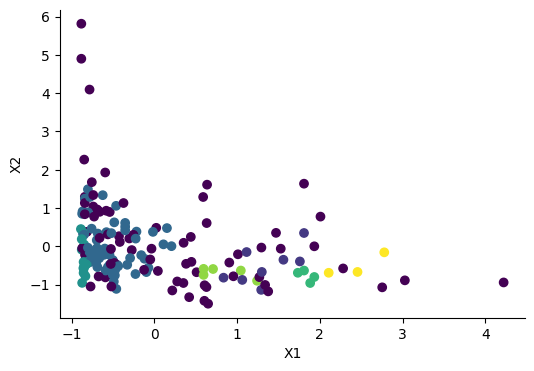

In [49]:
dbscan_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(df_float)
labels = dbscan_model.labels_

dbi = davies_bouldin_score(df_float, labels)
print(f'Davies-Bouldin Score: {dbi:.3f}')

f, ax = plt.subplots(figsize=(6,4))

ax.scatter(x=df_float.iloc[:, 0], y=df_float.iloc[:, 1], c=labels)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

sns.despine()
plt.show()

In [50]:
print(f'Número de clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
print(f'Número de pontos ruídos: {list(labels).count(-1)}')

Número de clusters: 6
Número de pontos ruídos: 72


## Calinski-Harabasz

In [51]:
from sklearn.metrics import calinski_harabasz_score

min_samples_range = range(3, (int(np.log(df_float.shape[0])) + 1), 1)

chi_best_min_samples = None
chi_best_score = -1  # Inicializa com -1 pois maior é melhor

for min_samples in min_samples_range:
    dbscan_model = DBSCAN(eps=1.0, min_samples=min_samples).fit(df_float)
    
    labels = dbscan_model.labels_
    
    if len(set(labels)) > 1:
        # Filtrar pontos de ruído
        # mask = labels != -1
        
        # if mask.sum() > 0:
            # score = calinski_harabasz_score(df_float[mask], labels[mask])
            score = calinski_harabasz_score(df_float, labels)
            
            print('Min_samples:', min_samples)
            print('Calinski-Harabasz Score:', score)
            # print('Clusters:', n_clusters, '| Ruído:', (labels == -1).sum())
            print('-----------------------------------')
            
            # Maior score é melhor
            if score > chi_best_score:
                chi_best_score = score
                chi_best_min_samples = min_samples

print(f'\nMelhor min_samples: {chi_best_min_samples}')
print(f'Melhor Calinski-Harabasz Score: {chi_best_score:.2f}')
print('(Quanto maior, melhor)')

Min_samples: 3
Calinski-Harabasz Score: 10.194409259890556
-----------------------------------
Min_samples: 4
Calinski-Harabasz Score: 10.918016850493279
-----------------------------------
Min_samples: 5
Calinski-Harabasz Score: 13.084020636078233
-----------------------------------

Melhor min_samples: 5
Melhor Calinski-Harabasz Score: 13.08
(Quanto maior, melhor)


In [52]:
best_params = None
best_score = -1

for param in param_grid:

  eps = param['eps']
  min_samples = param['min_samples']

  dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_float)
  labels = dbscan_model.labels_

  #evitar casos com apenas um cluster
  if len(set(labels)) > 1:

    score = calinski_harabasz_score(df_float, labels)

    print('min_samples:', min_samples)
    print('eps:', eps)
    print('Score:', score)
    print('-----------------------------------')

    if score > best_score:
      best_score = score
      best_params = param


print(f'Melhor parametros: {best_params}')
print(f'Melhor score: {best_score}')

min_samples: 3
eps: 1.0
Score: 10.194409259890556
-----------------------------------
min_samples: 4
eps: 1.0
Score: 10.918016850493279
-----------------------------------
min_samples: 5
eps: 1.0
Score: 13.084020636078233
-----------------------------------
min_samples: 3
eps: 1.1071428571428572
Score: 16.791206477647684
-----------------------------------
min_samples: 4
eps: 1.1071428571428572
Score: 20.3195276548847
-----------------------------------
min_samples: 5
eps: 1.1071428571428572
Score: 13.670623674529327
-----------------------------------
min_samples: 3
eps: 1.2142857142857142
Score: 18.529994559553344
-----------------------------------
min_samples: 4
eps: 1.2142857142857142
Score: 22.30736240271692
-----------------------------------
min_samples: 5
eps: 1.2142857142857142
Score: 21.761619052800736
-----------------------------------
min_samples: 3
eps: 1.3214285714285714
Score: 5.419630237912597
-----------------------------------
min_samples: 4
eps: 1.3214285714285714


Calinski-Harabasz Score: 22.906


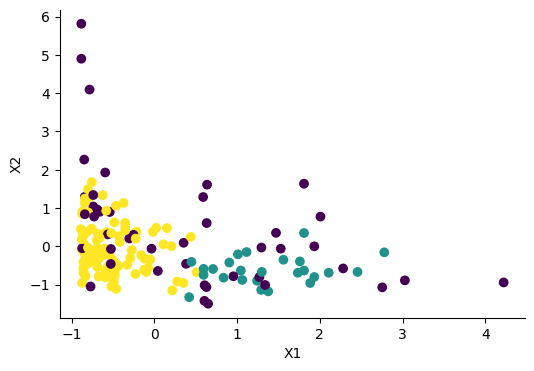

In [53]:
dbscan_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples']).fit(df_float)
labels = dbscan_model.labels_

dbi = calinski_harabasz_score(df_float, labels)
print(f'Calinski-Harabasz Score: {dbi:.3f}')

f, ax = plt.subplots(figsize=(6,4))

ax.scatter(x=df_float.iloc[:, 0], y=df_float.iloc[:, 1], c=labels)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

sns.despine()
plt.show()

In [54]:
print(f'Número de clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
print(f'Número de pontos ruídos: {list(labels).count(-1)}')

Número de clusters: 2
Número de pontos ruídos: 45
